In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import tensorflow as tf

In [2]:
df = pd.read_csv('Problem2 - Greenland.csv')

In [3]:
X = df[['PMF Factor 1','PMF Factor 2']]
y = df['PMF Factor 3']

In [4]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [60]:
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'relu', input_shape=(X_train.shape[1],)))
#model.add(keras.layers.Dense(units = 16, activation = 'relu'))
model.add(keras.layers.Dense(units = 32, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
#model.add(keras.layers.Dense(units = 128, activation = 'relu'))
#model.add(keras.layers.Dense(units = 256, activation = 'linear'))
#model.add(keras.layers.Dense(units = 512, activation = 'linear'))


#model.add(keras.layers.Dense(units = 256, activation = 'linear'))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 32, activation = 'relu'))
#model.add(keras.layers.Dense(units = 16, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer='sgd')

In [61]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 1)                 3         
                                                                 
 dense_91 (Dense)            (None, 32)                64        
                                                                 
 dense_92 (Dense)            (None, 64)                2112      
                                                                 
 dense_93 (Dense)            (None, 128)               8320      
                                                                 
 dense_94 (Dense)            (None, 64)                8256      
                                                                 
 dense_95 (Dense)            (None, 32)                2080      
                                                                 
 dense_96 (Dense)            (None, 1)               

In [62]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
9/9 [==============================] - 0s 2ms/step - loss: 0.7161
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2865
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1274
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0838
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0745
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0723
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0722
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0718
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0716
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0716
Epoch 11/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0716
Epoch 12/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0716
Epoch 13/100
9/9 [==============================] - 0s 2ms/st

In [63]:
y_predicted_test = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


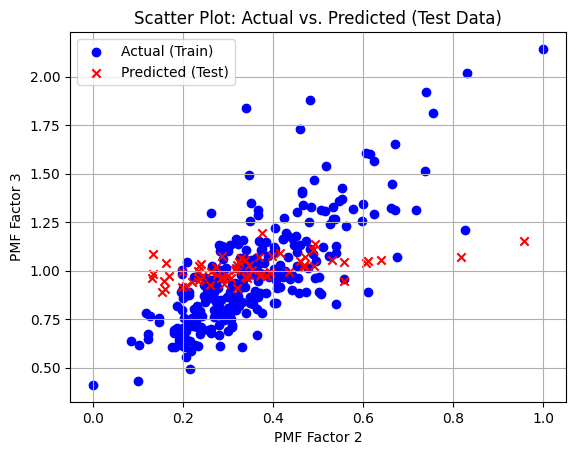

In [64]:
plt.scatter(X_train[:, 1], y_train, label='Actual (Train)', color='blue')
plt.scatter(X_test[:, 1], y_predicted_test, label='Predicted (Test)', color='red', marker='x')

plt.xlabel('PMF Factor 2')
plt.ylabel('PMF Factor 3')
plt.title('Scatter Plot: Actual vs. Predicted (Test Data)')
plt.legend()
plt.grid()
plt.show()